In [6]:
#13장 기초

def reward_penalty(kind, points):
    global current_point
    
    print('현재 점수 :', current_point)
    if kind == '상점':
        current_point += points
        print('상점 입력 후 점수 :', current_point)
    elif kind == '벌점':
        current_point -= points
        print('벌점 입력 후 점수 :', current_point)
        
    return current_point

current_point = 5
reward_penalty('상점', 5)

print('최종 점수 :', current_point)

현재 점수 : 5
상점 입력 후 점수 : 10
최종 점수 : 10


In [ ]:
#13장 사용자 정의 함수로 프로그램 재구성하기
#5장 구구단 

import random

def gugudan(num1, num2):
    answer = int(input(str(num1) + 'x' + str(num2) + '?'))
    
    if answer == num1 * num2:
        return 0
    else:
        print('땡! 정답은', num1 * num2)
        return -1

print('구구단을 외자! 구구단을 외자!')

for i in range(20):
    a, b = random.randint(2, 9), random.randint(1, 9)
    
    if gugudan(a, b) != 0:
        break

In [7]:
#13장 사용자 정의 함수로 프로그램 재구성하기
#5장 selfcheck

players = ['까치', '강아지', '토끼', '고양이', '참새']

def game_play(name, cnt):
    print(name * cnt)
    
def wrong_play(name, cnt):
    if name not in players:
        print(name, '은/는 없는 이름입니다.')
        return -1
    if cnt < 1 or cnt > 4:
        print('1~4의 숫자만 가능합니다! 입력한  숫자 : ', cnt)
        return -1
    
print('팅 팅팅팅 탱 탱탱탱 팅팅 탱탱 프라이팬 놀이')

for i in range(5):
    next_player, count = input('이름? '), int(input('횟수? '))
    
    check = wrong_play(next_player, count)
    if check == -1:
        break
    else:
        game_play(next_player, count)

팅 팅팅팅 탱 탱탱탱 팅팅 탱탱 프라이팬 놀이
이름? 까치
횟수? 3
까치까치까치
이름? 토끼
횟수? 5
1~4의 숫자만 가능합니다! 입력한  숫자 :  5


핫플레이스가 위치한 행정동을 입력하세요 : 압구정동
2019년 12월의 주중 일수 = 22 주말 일수 = 9


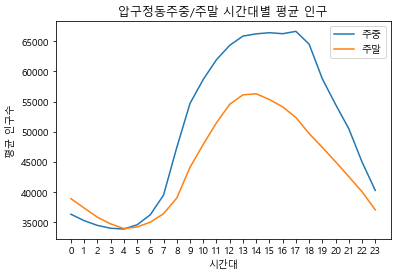

핫플레이스는 언제 가야 좋을까?
1. 시간대별 평균 인구는 어떻게 될까?
2. 주중에 가야 할까, 주말에 가야 할까?
3. 남성이 많을까, 여성이 많을까?
4. 나에게 익숙한 지역과 비교해 얼마나 붐빌까?
분석하고 싶은 내용의 번호를 입력해주세요 : 4
비교할 행정동 입력 : 역삼2동


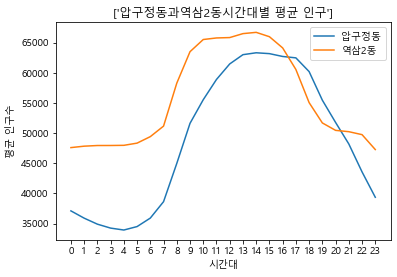

In [7]:
#13장 사용자 정의 함수로 프로그램 재구성하기
#11장 핫플레이스 프로젝트
#하위 목표 1

import matplotlib.pyplot as plt
import csv
import datetime

def file_open():
    f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding= 'utf8')
    f2 = open('dong_code.csv')

    data = csv.reader(f1)
    next(data)
    data = list(data)

    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)

    for row in data:
        for i in range(1, 32):
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])
            
    for row in code_data:
        row[1] = int(row[1])
        
    return data, code_data

def dong_search(dong_name):
    for row in code_data:
        if row[-1] == dong_name:
            dong_code = row[1]
            
    return dong_code
            
data, code_data = file_open()
    
input_name = input('핫플레이스가 위치한 행정동을 입력하세요 : ')
input_code = dong_search(input_name)

def graph_plot(popu_list, label_list, graph_title):
    plt.rc('font', family='Malgun Gothic')
    plt.title(graph_title)
    
    for i in range(len(popu_list)):
        plt.plot(range(24), popu_list[i], label=label_list[i])
    
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균 인구수')
    plt.xticks(range(24), range(24))
    plt.show()

#하위 목표 1 그래프
def analysis1(dong_name, dong_code, graph_yn='y'):
    population = [0 for i in range(24)]
    
    for row in data:
        if row[2] == dong_code:
            population[row[1]] += row[3]
        
    population = [p/31 for p in population]
    
    if graph_yn == 'n':
        return population
    
    population = [population]
    labels = ['평균 인구']
    title = dong_name + '시간대별 평균 인구'
    graph_plot(population, labels, title)

#하위 목표 2 그래프
def analysis2(dong_name, dong_code):
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]

    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5:
                weekday[time] += p
            else:
                weekend[time] += p

    #주말, 주중 일수 세서 평균 인구 구하기
    weekday_cnt, weekend_cnt = 0, 0

    for i in range(1, 32): #31일 까지
        if datetime.date(2019, 12, i).weekday() < 5:
            weekday_cnt += 1
        else:
            weekend_cnt += 1
        
    print('2019년 12월의 주중 일수 =', weekday_cnt, '주말 일수 =', weekend_cnt)

    weekday = [w/weekday_cnt for w in weekday]
    weekend = [w/weekend_cnt for w in weekend]

    data_set = [weekday, weekend]
    labels = ['주중', '주말']
    title = dong_name + '주중/주말 시간대별 평균 인구'
    graph_plot(data_set, labels, title)
    
analysis2(input_name, input_code)

def analysis3(dong_name, dong_code):
    male = [0 for i in range(24)]
    female = [0 for i in range(24)]

    for row in data:
        if row[2] == dong_code:
            time = row[1]
        
            male[time] += sum(row[4:18])
            female[time] += sum(row[18:32])
        
    male = [m/31 for m in male]
    female =[f/31 for f in female]
    
    data_set = [male, female]
    labels = ['남성', '여성']
    title = dong_name + '남녀 시간대별 평균 인구'
    graph_plot(data_set, labels, title)
    
def analysis4(dong_name1, dong_code1):
    dong_name2 = input('비교할 행정동 입력 : ')
    dong_code2 = dong_search(dong_name2)
    
    population1 = analysis1(dong_name1, dong_code1, graph_yn='n')
    population2 = analysis1(dong_name2, dong_code2, graph_yn='n')
    
    data_set = [population1, population2]
    labels = [dong_name1, dong_name2]
    title = dong_name1 + '과' + dong_name2 + '시간대별 평균 인구'
    graph_plot(data_set, labels, title)
    
print('핫플레이스는 언제 가야 좋을까?')
print('1. 시간대별 평균 인구는 어떻게 될까?')
print('2. 주중에 가야 할까, 주말에 가야 할까?')
print('3. 남성이 많을까, 여성이 많을까?')
print('4. 나에게 익숙한 지역과 비교해 얼마나 붐빌까?')

selection = int(input('분석하고 싶은 내용의 번호를 입력해주세요 : '))

if selection == 1:
    analysis1(input_name, input_code)
elif selection == 2:
    analysis2(input_name, input_code)
elif selection == 3:
    analysis3(input_name, input_code)
elif selection == 4:
    analysis4(input_name, input_code)  
else:
    print('잘못된 입력입니다.')

In [8]:
#13장 selfcheck 1

def gugudan(num):
    for i in range(1, 10):
        print(num, 'x', i, '=', num*i)

print('구구단을 외자! 구구단을 외자!')

gugudan(9)

구구단을 외자! 구구단을 외자!
9 x 1 = 9
9 x 2 = 18
9 x 3 = 27
9 x 4 = 36
9 x 5 = 45
9 x 6 = 54
9 x 7 = 63
9 x 8 = 72
9 x 9 = 81


In [9]:
#13장 selfcheck 2

def gugudan():
    for num in range(1, 10):
        print(num, '단 -')
        for i in range(1, 10):
            print(num, 'x', i, '=', num*i)

print('구구단을 외자! 구구단을 외자!')

gugudan()

구구단을 외자! 구구단을 외자!
1 단 -
1 x 1 = 1
1 x 2 = 2
1 x 3 = 3
1 x 4 = 4
1 x 5 = 5
1 x 6 = 6
1 x 7 = 7
1 x 8 = 8
1 x 9 = 9
2 단 -
2 x 1 = 2
2 x 2 = 4
2 x 3 = 6
2 x 4 = 8
2 x 5 = 10
2 x 6 = 12
2 x 7 = 14
2 x 8 = 16
2 x 9 = 18
3 단 -
3 x 1 = 3
3 x 2 = 6
3 x 3 = 9
3 x 4 = 12
3 x 5 = 15
3 x 6 = 18
3 x 7 = 21
3 x 8 = 24
3 x 9 = 27
4 단 -
4 x 1 = 4
4 x 2 = 8
4 x 3 = 12
4 x 4 = 16
4 x 5 = 20
4 x 6 = 24
4 x 7 = 28
4 x 8 = 32
4 x 9 = 36
5 단 -
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
6 단 -
6 x 1 = 6
6 x 2 = 12
6 x 3 = 18
6 x 4 = 24
6 x 5 = 30
6 x 6 = 36
6 x 7 = 42
6 x 8 = 48
6 x 9 = 54
7 단 -
7 x 1 = 7
7 x 2 = 14
7 x 3 = 21
7 x 4 = 28
7 x 5 = 35
7 x 6 = 42
7 x 7 = 49
7 x 8 = 56
7 x 9 = 63
8 단 -
8 x 1 = 8
8 x 2 = 16
8 x 3 = 24
8 x 4 = 32
8 x 5 = 40
8 x 6 = 48
8 x 7 = 56
8 x 8 = 64
8 x 9 = 72
9 단 -
9 x 1 = 9
9 x 2 = 18
9 x 3 = 27
9 x 4 = 36
9 x 5 = 45
9 x 6 = 54
9 x 7 = 63
9 x 8 = 72
9 x 9 = 81


In [12]:
#13장 selfcheck 3

def cal_grade(score):
    if score >= 80:
        return 'A'
    if score >= 40 and score < 80:
        return 'B'
    if score < 40:
        return 'C'
    
score = int(input('점수 : '))
print('등급 : ', cal_grade(score))

점수 : 22
등급 :  C
